In [1]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [2]:
df = pd.read_csv('cleaned.csv',  index_col=None)

In [3]:
df.head()

,track_id,genre_top,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
0,153,Rock,0.988306,0.255661,0.979774,0.973006,0.121342,0.051740,90.241,0.034018
1,154,Rock,0.970135,0.352946,0.023852,0.957113,0.113261,0.032177,53.758,0.035632
2,155,Rock,0.981657,0.142249,0.912122,0.967294,0.363510,0.087527,91.912,0.034325
3,169,Rock,0.989141,0.225978,0.722835,0.263076,0.092371,0.053406,94.322,0.028347
4,170,Rock,0.886660,0.298518,0.744333,0.920950,0.139587,0.088781,97.880,0.073548


# Pairwise relationships between continuous variables

In [4]:
corr_matrix = df.corr()
corr_matrix.style.background_gradient(cmap='binary')

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
track_id,1.000000,-0.372282,0.049454,0.140703,-0.275623,0.048231,-0.026995,-0.025392,0.010070
acousticness,-0.372282,1.000000,-0.028954,-0.281619,0.194780,-0.019991,0.072204,-0.026310,-0.013841
danceability,0.049454,-0.028954,1.000000,-0.242032,-0.255217,-0.106584,0.276206,-0.242089,0.473165
energy,0.140703,-0.281619,-0.242032,1.000000,0.028238,0.113331,-0.109983,0.195227,0.038603
instrumentalness,-0.275623,0.194780,-0.255217,0.028238,1.000000,-0.091022,-0.366762,0.022215,-0.219967
liveness,0.048231,-0.019991,-0.106584,0.113331,-0.091022,1.000000,0.041173,0.002732,-0.045093
speechiness,-0.026995,0.072204,0.276206,-0.109983,-0.366762,0.041173,1.000000,0.008241,0.149894
tempo,-0.025392,-0.026310,-0.242089,0.195227,0.022215,0.002732,0.008241,1.000000,0.052221
valence,0.010070,-0.013841,0.473165,0.038603,-0.219967,-0.045093,0.149894,0.052221,1.000000


### Dancebility and Valence are correlated maximum in this dataset

In [5]:
X = df.drop(['track_id', 'genre_top'], axis=1)
y = df.genre_top

# Normalizing the feature data

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Principal Component Analysis on our scaled data


In [7]:
pca = PCA()
pca.fit(X_scaled)
variances = pca.explained_variance_ratio_

In [8]:
variances

array([0.24297674, 0.18044316, 0.13650309, 0.12994089, 0.11056248,
       0.08302245, 0.06923783, 0.04731336])

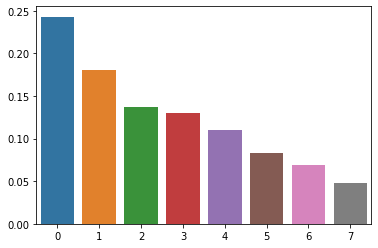

In [9]:
sns.barplot(y=variances, x=list(range(pca.n_components_)))

# Further visualization of PCA

In [10]:
cummilative = np.cumsum(variances)

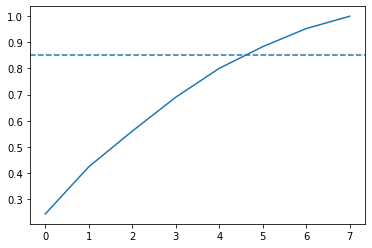

In [11]:
ax = sns.lineplot(y=cummilative, x=list(range(pca.n_components_)));
ax.axhline(y=0.85, linestyle='--')

In [12]:
choosen_n = 6
pca = PCA(choosen_n, random_state=42)
pca.fit(X_scaled)
pca_projected = pca.transform(X_scaled)

In [13]:
pca_projected.shape

(4802, 6)

In [14]:
y.value_counts()

Rock       3892
Hip-Hop     910
Name: genre_top, dtype: int64

### Imbalanced dataset

# Train a decision tree to classify genre


In [15]:
X_train, X_test, y_train, y_test = train_test_split(pca_projected, y, stratify=y)

In [16]:
DecisionTreeClassifier?

In [17]:
tree = DecisionTreeClassifier(random_state=42)

In [18]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [19]:
y_pred = tree.predict(X_test)

In [20]:
accuracy_score(y_true=y_test, y_pred=y_pred)

0.855120732722731

In [21]:
confusion_matrix(y_true=y_test, y_pred=y_pred)

array([[147,  81],
       [ 93, 880]])

In [22]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

     Hip-Hop       0.61      0.64      0.63       228
        Rock       0.92      0.90      0.91       973

    accuracy                           0.86      1201
   macro avg       0.76      0.77      0.77      1201
weighted avg       0.86      0.86      0.86      1201



# Compare our decision tree to a logistic regression


In [23]:
log_reg = LogisticRegression(random_state=42)

In [24]:
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
y_pred_reg = log_reg.predict(X_test)

In [26]:
accuracy_score(y_true=y_test, y_pred=y_pred_reg)

0.8751040799333888

In [27]:
confusion_matrix(y_true=y_test, y_pred=y_pred_reg)

array([[116, 112],
       [ 38, 935]])

In [28]:
print(classification_report(y_true=y_test, y_pred=y_pred_reg))

              precision    recall  f1-score   support

     Hip-Hop       0.75      0.51      0.61       228
        Rock       0.89      0.96      0.93       973

    accuracy                           0.88      1201
   macro avg       0.82      0.73      0.77      1201
weighted avg       0.87      0.88      0.87      1201



# Balance our data for greater performance

In [29]:
rock = df[df.genre_top=='Rock']

In [30]:
hop = df[df.genre_top=='Hip-Hop']

In [31]:
hop.sample(n=900)

,track_id,genre_top,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
4209,15144,Hip-Hop,0.161527,0.611318,0.229768,0.930221,0.085714,0.063875,157.921,0.955271
3931,5265,Hip-Hop,0.727330,0.185407,0.938232,0.558805,0.111546,0.370179,160.237,0.046452
4138,13725,Hip-Hop,0.031226,0.628698,0.831144,0.001110,0.182297,0.067901,97.014,0.653132
4610,40527,Hip-Hop,0.419791,0.533791,0.780637,0.786020,0.091891,0.053786,206.063,0.235292
4255,16534,Hip-Hop,0.255002,0.845890,0.827900,0.911723,0.039846,0.065339,99.681,0.863489
...,...,...,...,...,...,...,...,...,...,...
3948,7487,Hip-Hop,0.406083,0.600080,0.689903,0.000447,0.422228,0.180573,87.880,0.590514
4480,32493,Hip-Hop,0.121386,0.475046,0.464655,0.002926,0.343911,0.556291,116.677,0.741007
4222,15203,Hip-Hop,0.556557,0.747906,0.430304,0.006519,0.177778,0.256353,86.961,0.347411
4688,51650,Hip-Hop,0.698526,0.723801,0.809145,0.891789,0.102043,0.029645,117.987,0.244987


In [32]:
sampled_data_set = pd.concat([rock.sample(n=900), hop.sample(n=900)], axis=0)

In [33]:
sampled_data_set.genre_top.value_counts()

Rock       900
Hip-Hop    900
Name: genre_top, dtype: int64

# Does balancing our dataset improve model bias?


In [34]:
scaler_new = StandardScaler()
X_new = sampled_data_set.drop(['track_id', 'genre_top'], axis=1)
y_new = sampled_data_set.genre_top

In [35]:
X_new_scaled = scaler_new.fit_transform(X_new)

In [36]:
pca_new = PCA(choosen_n, random_state=42)

In [37]:
pca_new.fit(X_new_scaled)

PCA(copy=True, iterated_power='auto', n_components=6, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

In [38]:
pca_projected_new = pca_new.fit_transform(X_new_scaled)

In [39]:
pca_projected_new.shape

(1800, 6)

In [40]:
y_new.shape

(1800,)

In [41]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(pca_projected_new, y_new, stratify=y_new)

In [42]:
X_train_new.shape, X_test_new.shape, y_train_new.shape, y_test_new.shape

((1350, 6), (450, 6), (1350,), (450,))

In [43]:
tree_new = DecisionTreeClassifier(random_state=42)
log_reg_new = LogisticRegression(random_state=42)

In [44]:
tree_new.fit(X_train_new, y_train_new)
log_reg_new.fit(X_train_new, y_train_new)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
y_pred_tree_new = tree_new.predict(X_test_new)
y_pred_log_new = log_reg_new.predict(X_test_new)

In [46]:
print('Tree accuracy: ', accuracy_score(y_true=y_test_new, y_pred=y_pred_tree_new))

Tree accuracy:  0.7977777777777778


In [47]:
print('Logistics Regression accuracy: ', accuracy_score(y_true=y_test_new, y_pred=y_pred_log_new))

Logistics Regression accuracy:  0.8444444444444444


In [48]:
print("Decision Tree: \n", classification_report(y_true=y_test_new, y_pred=y_pred_tree_new))
print("Logistic Regression: \n", classification_report(y_true=y_test_new, y_pred=y_pred_log_new))

Decision Tree: 
               precision    recall  f1-score   support

     Hip-Hop       0.80      0.79      0.80       225
        Rock       0.79      0.81      0.80       225

    accuracy                           0.80       450
   macro avg       0.80      0.80      0.80       450
weighted avg       0.80      0.80      0.80       450

Logistic Regression: 
               precision    recall  f1-score   support

     Hip-Hop       0.86      0.82      0.84       225
        Rock       0.83      0.87      0.85       225

    accuracy                           0.84       450
   macro avg       0.85      0.84      0.84       450
weighted avg       0.85      0.84      0.84       450



# Using cross-validation to evaluate our models


In [49]:
kf = KFold(n_splits=30, random_state=42, shuffle=True)

In [50]:
tree_kf = DecisionTreeClassifier(random_state=42)
log_reg_kf = LogisticRegression(random_state=42)

In [51]:
tree_score = cross_val_score(tree_kf, pca_projected, y, cv = kf)
log_reg_score = cross_val_score(log_reg_kf, pca_projected, y, cv = kf)

print("Decision Tree:", np.mean(tree_score), "Logistic Regression:", np.mean(log_reg_score))

Decision Tree: 0.8602562111801241 Logistic Regression: 0.8775478778467909


# Without PCA

In [52]:
log_reg = LogisticRegression(random_state=42)

In [53]:
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [54]:
y_pred_simple = log_reg.predict(X_test)

In [55]:
accuracy_score(y_pred=y_pred_simple, y_true=y_test)

0.8751040799333888

In [56]:
confusion_matrix(y_pred=y_pred_simple, y_true=y_test)

array([[116, 112],
       [ 38, 935]])

In [57]:
print(classification_report(y_pred=y_pred_simple, y_true=y_test))

              precision    recall  f1-score   support

     Hip-Hop       0.75      0.51      0.61       228
        Rock       0.89      0.96      0.93       973

    accuracy                           0.88      1201
   macro avg       0.82      0.73      0.77      1201
weighted avg       0.87      0.88      0.87      1201



In [58]:
Pkl_Filename = "model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(log_reg, file)